In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 간단한 tips 샘플 데이터
data = {
    "day": ["Thur", "Fri", "Fri", "Sat", "Sat", "Sun", "Sun", "Sun", "Sun", "Thur"],
    "total_bill": [12.3, 23.1, 15.4, 35.6, 40.1, 20.2, 21.3, 18.4, 25.1, 16.2],
    "tip": [2.0, 3.5, 2.5, 5.2, 6.0, 3.0, 3.3, 2.9, 4.1, 2.1],
    "size": [2, 2, 1, 3, 4, 2, 3, 2, 4, 2],
}
df = pd.DataFrame(data)

# Intro to data analysis

In [174]:
df

,day,total_bill,tip,size
0,Thur,12.3,2.0,2
1,Fri,23.1,3.5,2
2,Fri,15.4,2.5,1
3,Sat,35.6,5.2,3
4,Sat,40.1,6.0,4
5,Sun,20.2,3.0,2
6,Sun,21.3,3.3,3
7,Sun,18.4,2.9,2
8,Sun,25.1,4.1,4
9,Thur,16.2,2.1,2


In [175]:
print(df["tip"].mean())

3.46


In [176]:
lst = df["tip"].values
lst.sort()
lst

array([2. , 2.1, 2.5, 2.9, 3. , 3.3, 3.5, 4.1, 5.2, 6. ])

### scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

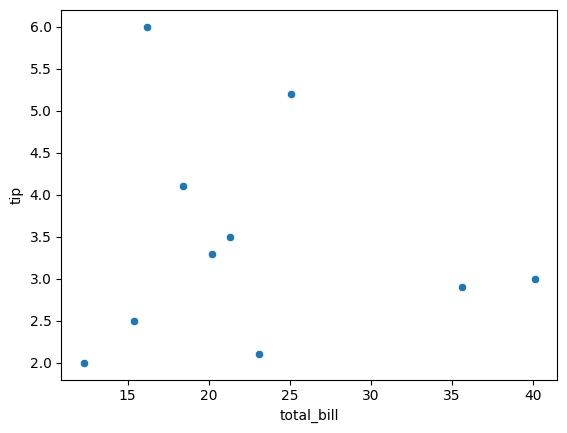

In [177]:
sns.scatterplot(x="total_bill", y="tip", data=df)

<Axes: xlabel='day', ylabel='total_bill'>

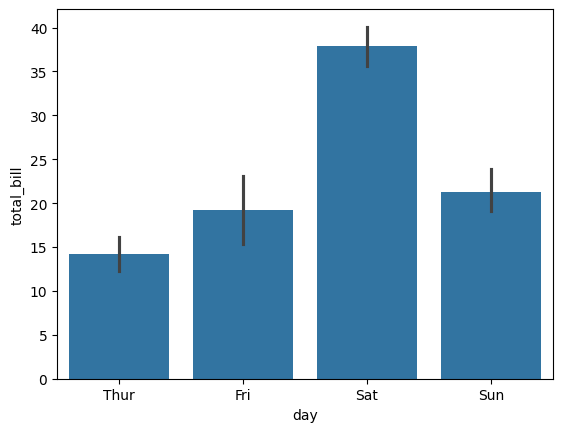

In [178]:
sns.barplot(data=df, x="day", y="total_bill")

<Axes: xlabel='tip', ylabel='total_bill'>

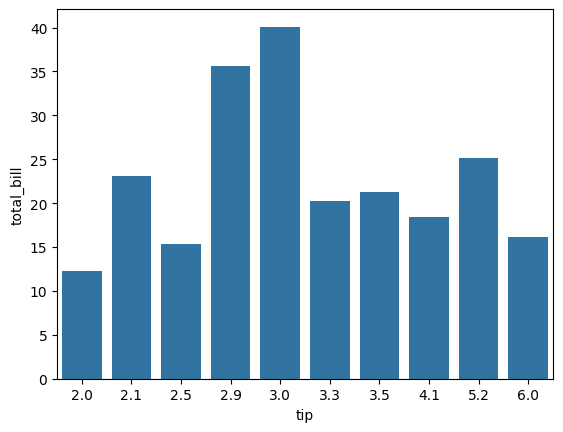

In [179]:
sns.barplot(data=df, x="tip", y="total_bill")

In [180]:
df["?"] = df["total_bill"] / df["size"]
df["?"] = df["?"].round(2)
df

,day,total_bill,tip,size,?
0,Thur,12.3,2.0,2,6.15
1,Fri,23.1,2.1,2,11.55
2,Fri,15.4,2.5,1,15.40
3,Sat,35.6,2.9,3,11.87
4,Sat,40.1,3.0,4,10.02
5,Sun,20.2,3.3,2,10.10
6,Sun,21.3,3.5,3,7.10
7,Sun,18.4,4.1,2,9.20
8,Sun,25.1,5.2,4,6.28
9,Thur,16.2,6.0,2,8.10


In [181]:
df["?2"] = df["total_bill"] * 1.08
df

,day,total_bill,tip,size,?,?2
0,Thur,12.3,2.0,2,6.15,13.284
1,Fri,23.1,2.1,2,11.55,24.948
2,Fri,15.4,2.5,1,15.40,16.632
3,Sat,35.6,2.9,3,11.87,38.448
4,Sat,40.1,3.0,4,10.02,43.308
5,Sun,20.2,3.3,2,10.10,21.816
6,Sun,21.3,3.5,3,7.10,23.004
7,Sun,18.4,4.1,2,9.20,19.872
8,Sun,25.1,5.2,4,6.28,27.108
9,Thur,16.2,6.0,2,8.10,17.496


<Axes: xlabel='total_bill', ylabel='?2'>

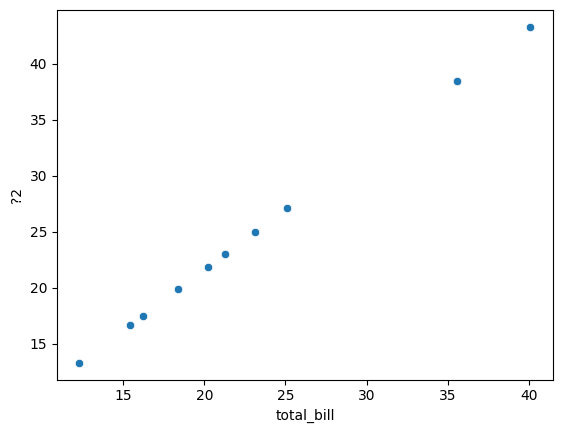

In [182]:
sns.scatterplot(data=df, x="total_bill", y="?2")

In [183]:
tipdata = sns.load_dataset("tips")
tipdata

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='size'>

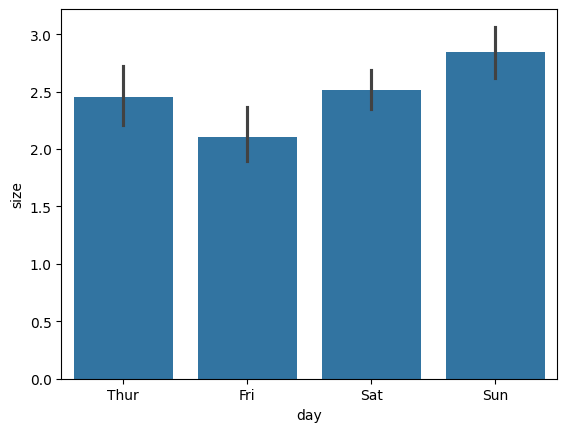

In [184]:
sns.barplot(data=tipdata, x="day", y="size")

In [185]:
order_counts = df["day"].value_counts()
order_counts

day
Sun     4
Thur    2
Fri     2
Sat     2
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x158dfdc40>,
 [Text(0.33991865722907993, 1.0461621798113232, 'Sun'),
  Text(-1.0999999999999959, -9.616505800409723e-08, 'Thur'),
  Text(-0.33991831634615544, -1.046162290570825, 'Fri'),
  Text(0.8899186414035474, -0.6465638496563697, 'Sat')])

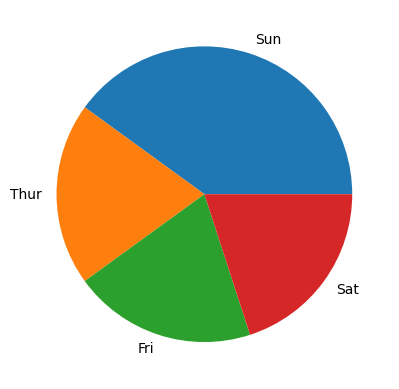

In [186]:
order_counts = df["day"].value_counts()
order_counts

plt.pie(order_counts, labels=order_counts.index)

<Axes: xlabel='tip', ylabel='Count'>

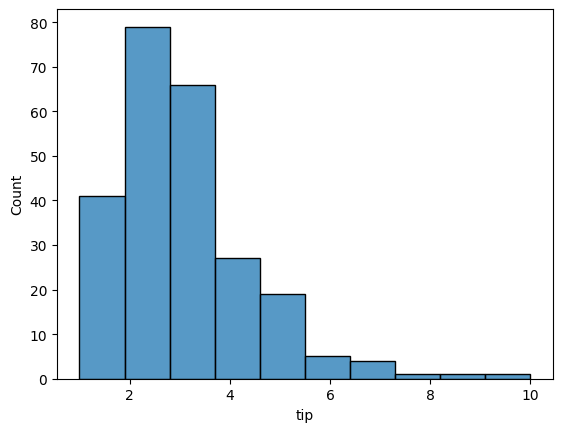

In [187]:
sns.histplot(data=tipdata, x="tip", bins=10)

<Axes: xlabel='day'>

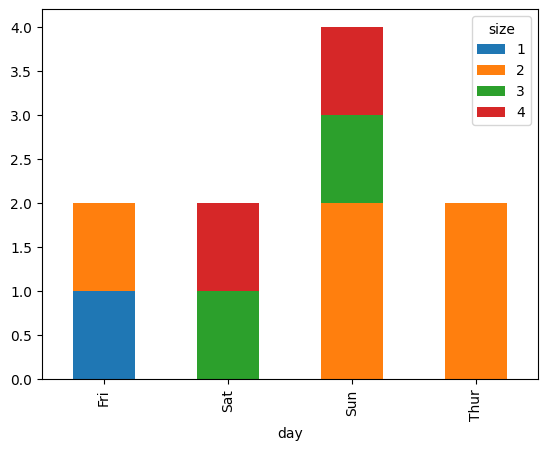

In [188]:
crosstab = pd.crosstab(df["day"], df["size"])
crosstab.plot(kind="bar", stacked=True)

In [189]:
tipdata[["sex", "size", "total_bill"]].groupby(["sex", "size"]).mean().unstack()

/var/folders/0s/p6r6pj_15m5cg5q_gj8_xdjm0000gn/T/ipykernel_89460/493397127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tipdata[["sex","size","total_bill"]].groupby(["sex","size"]).mean().unstack()


total_bill                                                  
size            1          2          3          4        5       6
sex                                                                
Male     8.580000  17.104082  24.287083  28.078214  30.1225  41.235
Female   6.796667  15.339483  21.547143  30.278889  29.8500  28.425

In [190]:
tipdata

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [191]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='petal_length', ylabel='petal_width'>

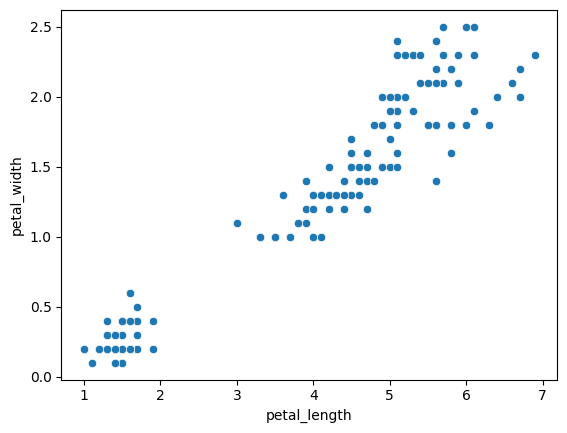

In [192]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width")

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

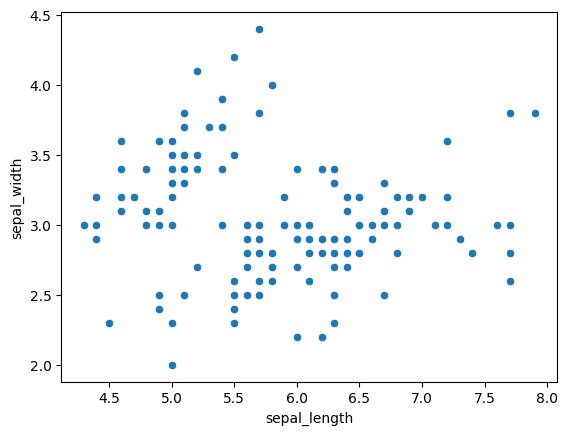

In [193]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width")

<Axes: xlabel='petal_length', ylabel='Count'>

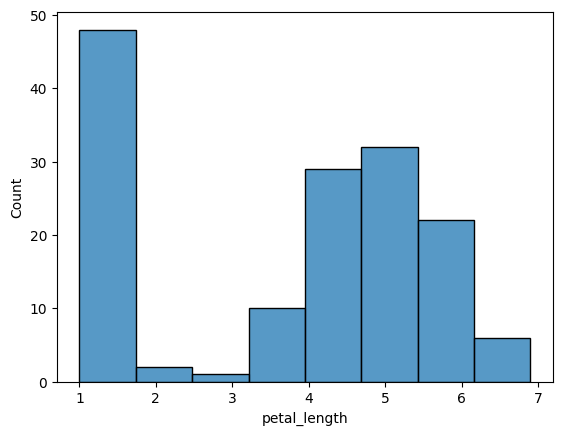

In [194]:
sns.histplot(data=iris, x="petal_length", bins=8)
# sns.histplot(data=tipdata, x="tip", bins=10)

<Axes: xlabel='petal_width', ylabel='Count'>

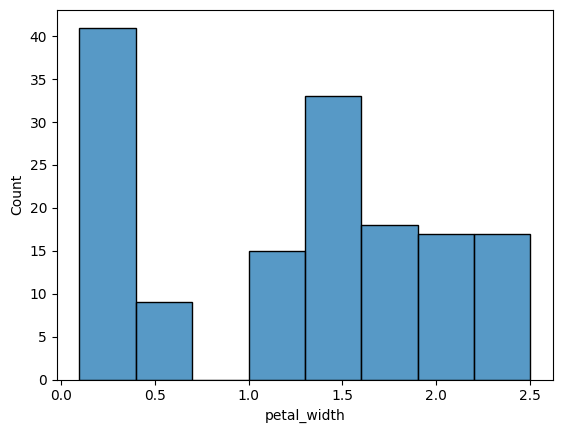

In [195]:
sns.histplot(data=iris, x="petal_width", bins=8)
# sns.histplot(data=tipdata, x="tip", bins=10)

<Axes: xlabel='sepal_length', ylabel='Count'>

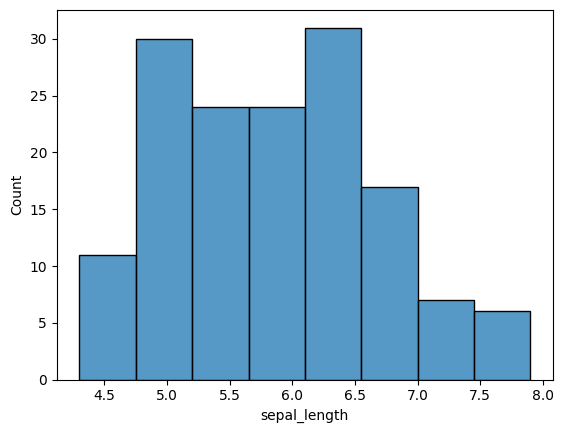

In [196]:
sns.histplot(data=iris, x="sepal_length", bins=8)
# sns.histplot(data=tipdata, x="tip", bins=10)

<Axes: xlabel='sepal_width', ylabel='Count'>

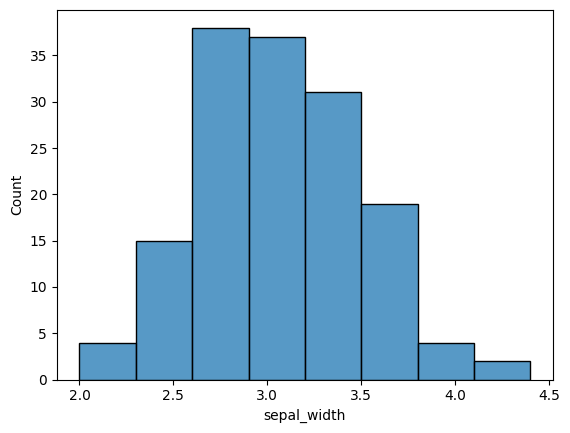

In [197]:
sns.histplot(data=iris, x="sepal_width", bins=8)
# sns.histplot(data=tipdata, x="tip", bins=10)

In [198]:
print(iris["sepal_length"].std())
print(iris["sepal_width"].std())
print(iris["petal_length"].std())
print(iris["petal_width"].std())

0.828066127977863
0.4358662849366982
1.7652982332594662
0.7622376689603465


In [199]:
print(tipdata["total_bill"].mean())
print(tipdata["total_bill"].std())

19.78594262295082
8.902411954856856


<Axes: xlabel='total_bill', ylabel='Count'>

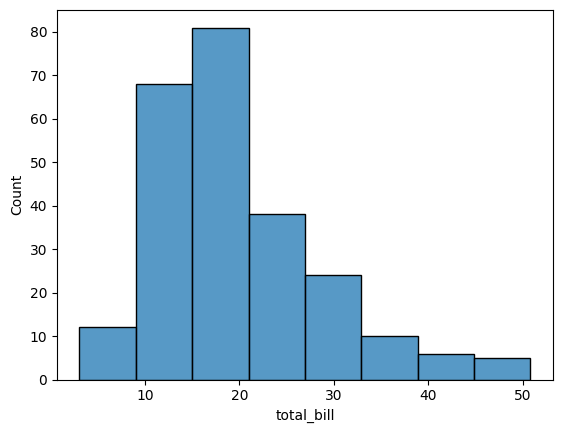

In [200]:
sns.histplot(data=tipdata, x="total_bill", bins=8)
# sns.histplot(data=tipdata, x="tip", bins=10)

<Axes: xlabel='day'>

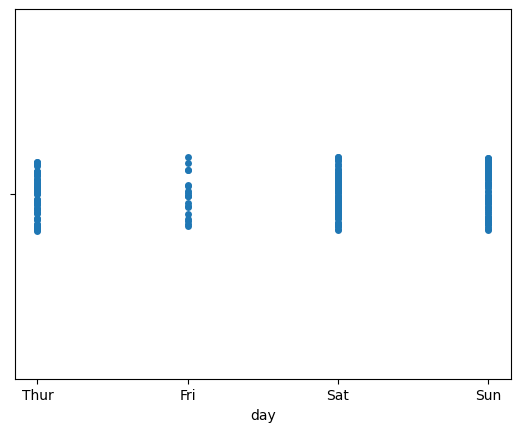

In [201]:
sns.stripplot(data=tipdata, x="day")

### pick your data
- penguin
- tips
- iris
- exercise

In [202]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [203]:
print(df["species"].unique())
print(df["island"].unique())
print(df["sex"].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


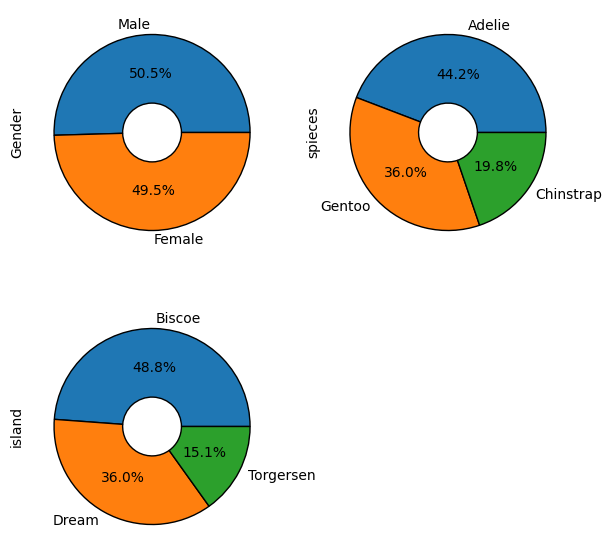

In [204]:
plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
cnts = df["sex"].value_counts()
plt.pie(
    cnts,
    labels=cnts.index,
    autopct="%.1f%%",
    wedgeprops={"width": 0.7, "edgecolor": "black"},
)
plt.ylabel("Gender")

plt.subplot(2, 2, 2)
cnts = df["species"].value_counts()
plt.pie(
    cnts,
    labels=cnts.index,
    autopct="%.1f%%",
    wedgeprops={"width": 0.7, "edgecolor": "black"},
)
plt.ylabel("spieces")

plt.subplot(2, 2, 3)
cnts = df["island"].value_counts()
plt.pie(
    cnts,
    labels=cnts.index,
    autopct="%.1f%%",
    wedgeprops={"width": 0.7, "edgecolor": "black"},
)
plt.ylabel("island")


plt.show()

<Axes: xlabel='species', ylabel='count'>

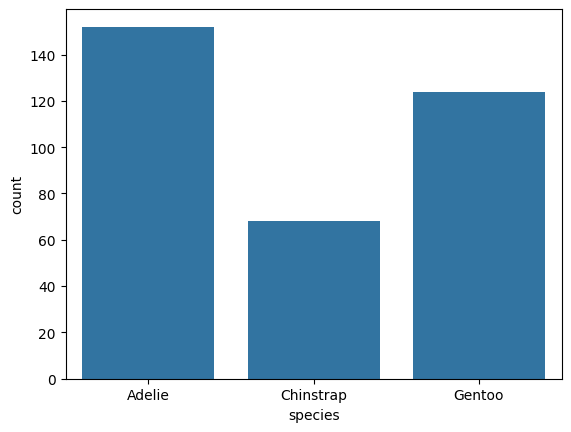

In [207]:
sns.countplot(data=df, x="species")

<Axes: xlabel='species', ylabel='count'>

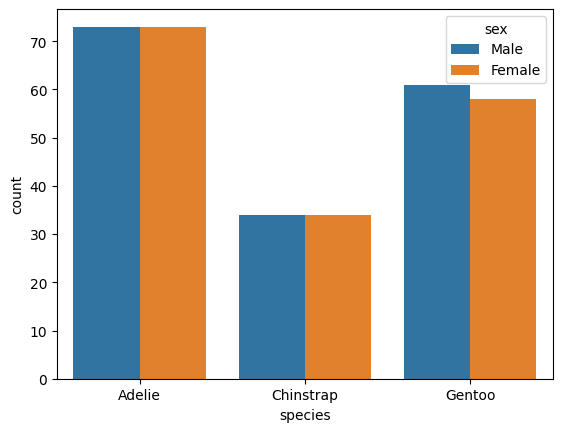

In [ ]:
sns.countplot(data=df, x="species", hue="sex")

<Axes: xlabel='species', ylabel='count'>

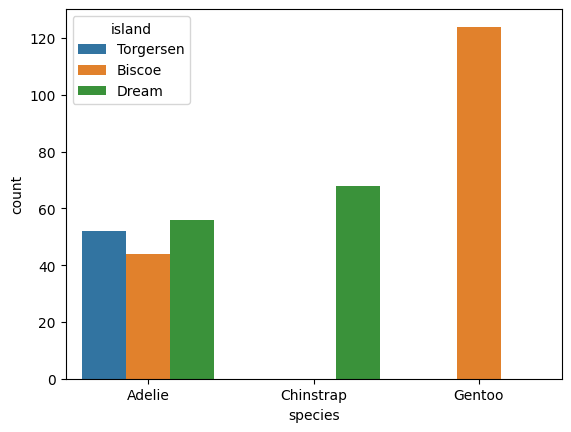

In [147]:
sns.countplot(data=df, x="species", hue="island")

<Axes: xlabel='species', ylabel='body_mass_g'>

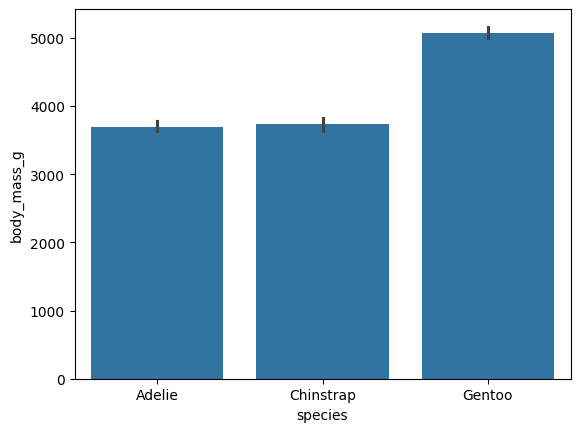

In [150]:
sns.barplot(data=df, x="species", y="body_mass_g")

<Axes: xlabel='species', ylabel='body_mass_g'>

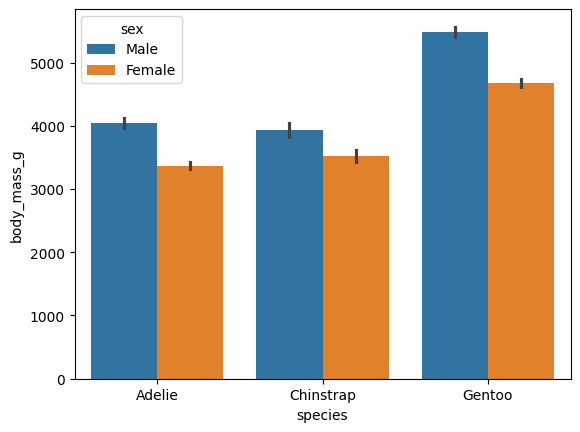

In [151]:
sns.barplot(data=df, x="species", y="body_mass_g", hue="sex")

<Axes: xlabel='species', ylabel='body_mass_g'>

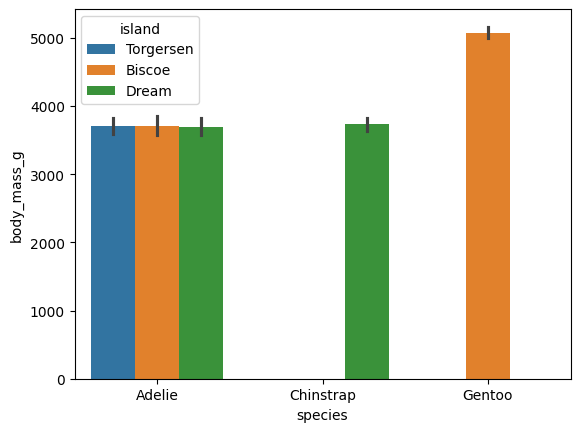

In [152]:
sns.barplot(data=df, x="species", y="body_mass_g", hue="island")

<Axes: xlabel='species', ylabel='flipper_length_mm'>

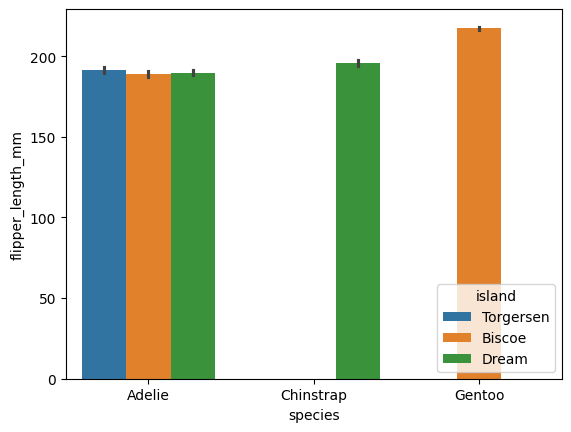

In [153]:
sns.barplot(data=df, x="species", y="flipper_length_mm", hue="island")

In [156]:
df = sns.load_dataset("exercise")
df = df.iloc[:, 2:]
df

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest
...,...,...,...,...
85,no fat,135,15 min,running
86,no fat,130,30 min,running
87,no fat,99,1 min,running
88,no fat,111,15 min,running


In [162]:
print(df["diet"].unique())
print(df["kind"].unique())

['low fat', 'no fat']
Categories (2, object): ['no fat', 'low fat']
['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']


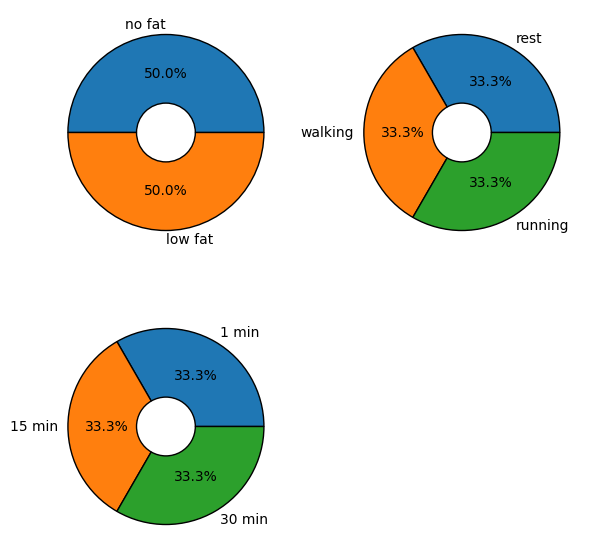

In [167]:
plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
cnts = df["diet"].value_counts()
plt.pie(
    cnts,
    labels=cnts.index,
    autopct="%.1f%%",
    wedgeprops={"width": 0.7, "edgecolor": "black"},
)
# plt.ylabel("Gender")

plt.subplot(2, 2, 2)
cnts = df["kind"].value_counts()
plt.pie(
    cnts,
    labels=cnts.index,
    autopct="%.1f%%",
    wedgeprops={"width": 0.7, "edgecolor": "black"},
)
# plt.ylabel("spieces")

plt.subplot(2, 2, 3)
cnts = df["time"].value_counts()
plt.pie(
    cnts,
    labels=cnts.index,
    autopct="%.1f%%",
    wedgeprops={"width": 0.7, "edgecolor": "black"},
)
# plt.ylabel("island")


plt.show()

<Axes: xlabel='kind', ylabel='pulse'>

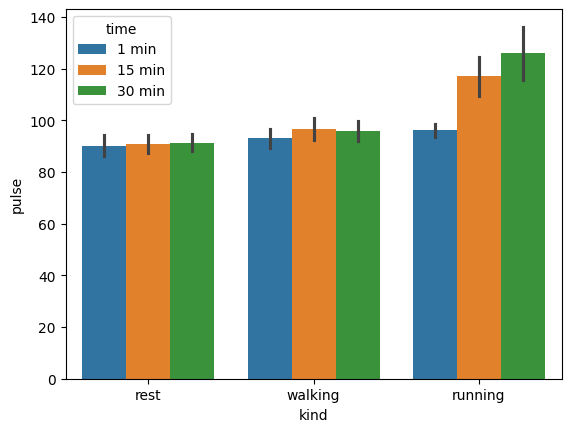

In [171]:
sns.barplot(data=df, x="kind", y="pulse", hue="time")